In [1]:
import os
from skypy.pipeline import Pipeline
from g_g_lensing import get_galaxyparas_from_pipeline
from g_g_lensing import GGlensing_images_plot

In [2]:
class Skypipeline:
    """
    This Class is for execute the pipeline from Skypy and return the current pipeline state
    """
    def __init__(self, skypy_config):
        """
        :param skypy_config: os.path.join("certain file")
        """
        self.skypy_config = skypy_config
        self.pipeline = Pipeline.read(skypy_config)  # create a Pipeline instance using the specified skypy_config file

    def run_pipeline(self):
        """

        Run the pipeline and return the pipeline state.
        """
        self.pipeline.execute()
        return self.pipeline


numpix = 64  # number of pixels per axis of the image to be modelled

path = os.getcwd()
dirpath, _ = os.path.split(path)
module_path, _ = os.path.split(dirpath)
skypy_config = os.path.join(module_path, 'Data\SkyPy\lsst-like.yml') #read the file
skycon = Skypipeline(skypy_config).run_pipeline()# access the results
print(skycon.state)

configblue = get_galaxyparas_from_pipeline(pipeline=skycon, mag_cut=22, z_min=0.8, z_max=2, galaxy_type='blue', position_scatter=0.5)
configred = get_galaxyparas_from_pipeline(pipeline=skycon, mag_cut=20, z_min=0.1, z_max=0.4, galaxy_type='red', position_scatter=0.0)

{'cosmology': FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897), 'mag_lim': 35, 'fsky': <Quantity 0.1 deg2>, 'z_range': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]), 'M_star_blue': <Linear1D(slope=-0.9408582, intercept=-20.40492365)>, 'phi_star_blue': <Exponential1D(amplitude=0.00370253, tau=-9.73858)>, 'alpha_blue': -1.3, 'M_star_red': <Linear1D(slope=-0.70798041, intercept=-20.37196157)>, 'phi_star_red': <Exponential1D(amplitude=0.0035097, tau=-1.41649)>, 'alpha_red': -0.5, 'blue': <Table length=1105843>
         z                   M          ...       mag_Y       
                                        ...                   
      float64             float64      

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\lenstronomy\Util\data_util.py:23: RuntimeWarning: invalid value encountered in double_scalars
  sigma_bkg = np.sqrt(readout_noise_tot + sky_brightness_tot) / exposure_time_tot
C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\lenstronomy\SimulationAPI\observation_api.py:231: RuntimeWarning: invalid value encountered in divide
  noise = np.sqrt(variance) / self.exposure_time


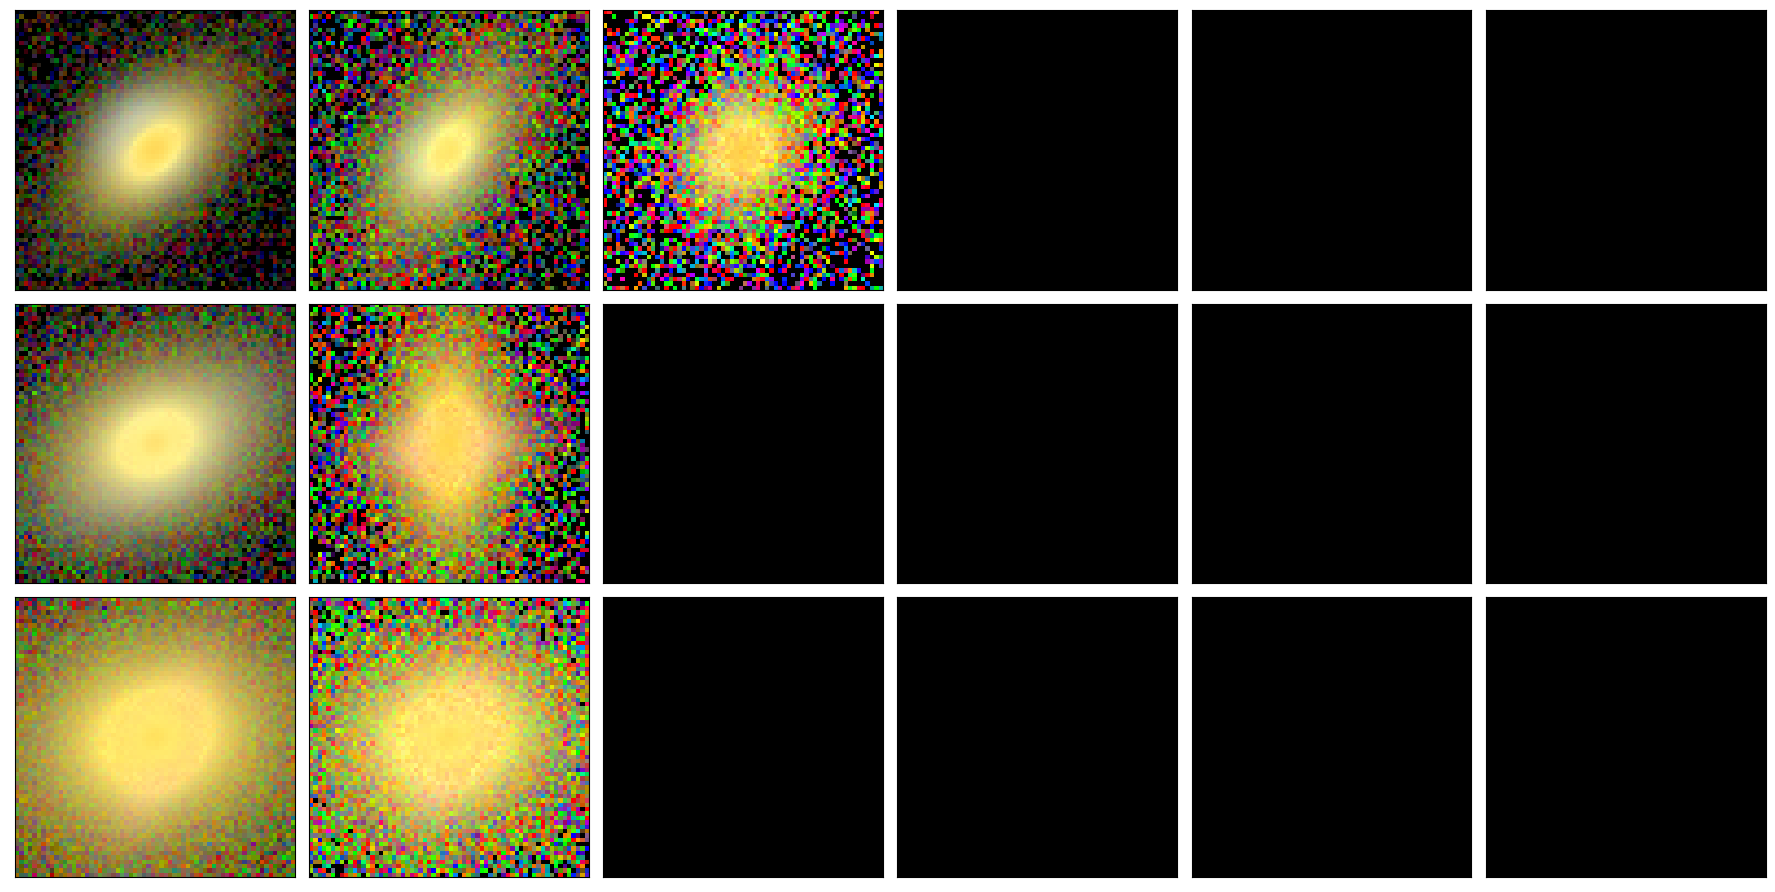

In [3]:
ggl_images_plot = GGlensing_images_plot(configblue, configred, None)
ggl_images_plot.plot_images(use_noise=True, n_horizont=6, n_vertical=3)